**Zadanie 1.**

$A = \left[\begin{matrix}
1 & 1 \\
1 & 1.0001\\
\end{matrix}\right]$,
$b_1 = \left[\begin{matrix}
2 \\
2.0001 \\
\end{matrix}\right]$,
$b_2 = \left[\begin{matrix}
2 \\
2 \\
\end{matrix}\right]$.<br><br>

$a) \quad Ax = b_1 \\
Ax = \left[\begin{matrix}
1 & 1 \\
1 & 1.0001\\
\end{matrix}\right] *
\left[\begin{matrix}
x_1 \\
x_2 \\
\end{matrix}\right] =
\left[\begin{matrix}
2 \\
2.0001 \\
\end{matrix}\right] = b_1 \quad , \quad
\begin{cases}
x_1 + x_2 = 2 \\
x_1 + 1.0001*x_2 = 2.0001\\
\end{cases} \\
0.0001*x_2 = 0.0001 \quad , \quad
x_2 = 1 \quad , \quad
x_1 = 2 - x_2 \quad , \quad
x_1 = 2 - 1 \quad , \quad
x_1 = 1 \\
\begin{cases}
x_1 = 1 \\
x_2 = 1 ,
\end{cases}$
<br><br>

$b) \quad Ax = b_2 \\
Ax = \left[\begin{matrix}
1 & 1 \\
1 & 1.0001\\
\end{matrix}\right] *
\left[\begin{matrix}
x_1 \\
x_2 \\
\end{matrix}\right] =
\left[\begin{matrix}
2 \\
2 \\
\end{matrix}\right] = b_1 \quad , \quad
\begin{cases}
x_1 + x_2 = 2 \\
x_1 + 1.0001*x_2 = 2\\
\end{cases} \\
0.0001*x_2 = 0 \quad , \quad
x_2 = 0 \quad , \quad
x_1 = 2 - x_2 \quad , \quad
x_1 = 2 - 0 \quad , \quad
x_1 = 2 \\
\begin{cases}
x_1 = 2 \\
x_2 = 0 ,
\end{cases}$
<br><br>
Współczynnik uwarunkowania macierzy:
<br><br>
$cond(a) = ||A|| * ||A^{-1}|| \\
A^{-1} = \left[\begin{matrix}
10001 & -10000 \\
-10000 & 10000\\
\end{matrix}\right]\\
||A|| = 2.0001 \quad ||A^{-1}|| = 20001\\
cond(a) = 2.0001 * 20001 = 40004.0001$

**Zadanie 2.**

In [2]:
#Zadanie 2
import numpy as np
from numpy import linalg as lg
from scipy.linalg import hilbert
    

H = hilbert(8)

spectral = lg.norm(H,2) * lg.norm(lg.inv(H),2) 
col = lg.norm(H,np.inf) * lg.norm(lg.inv(H),np.inf)
row = lg.norm(H,1) * lg.norm(lg.inv(H),1)

print("Współczynnik uwarunkowania macierzy obliczony przy wykorzystaniu normy spektralnej:",spectral)
print("Współczynnik uwarunkowania macierzy obliczony przy wykorzystaniu normy wierszowej:",row)
print("Współczynnik uwarunkowania macierzy obliczony przy wykorzystaniu normy kolumnowej:",col)

Współczynnik uwarunkowania macierzy obliczony przy wykorzystaniu normy spektralnej: 15257576321.957926
Współczynnik uwarunkowania macierzy obliczony przy wykorzystaniu normy wierszowej: 33872792384.49069
Współczynnik uwarunkowania macierzy obliczony przy wykorzystaniu normy kolumnowej: 33872792385.924484


Na podstawie obliczonych współczynników można stwierdzić, że macierz Hilberta jest źle uwarunkowana

**Zadanie 3.**

In [4]:
#Zadanie 3
import time
import math
from numpy import linalg as lg
from scipy.linalg import solve_triangular as solvetri

n = 20
t = np.linspace(0,1,n)
b = [math.cos(4*i) for i in t]

A = np.fliplr(np.vander(t))

#1) Metoda "solve"
start = time.time()
x1 = lg.solve(A,b)
end = time.time()
r = b - A*x1
print("1. Metoda \"solve\":")
print(" - czas wykonania:", end-start)
print(" - norma residuum:", lg.norm(r))

#2) Metoda rozkładu QR
start = time.time()
Q, R = lg.qr(A)
x2 = solvetri(Q,R)
end = time.time()
r = b - A*x2
print("2. Metoda rozkładu QR:")
print(" - czas wykonania:", end-start)
print(" - norma residuum:", lg.norm(r))

#3) Metoda "lstsq"
start = time.time()
x3,_,_,_ = lg.lstsq(A,b, None)
end = time.time()
r = b - A*x3
print("3. Metoda \"lstsq\":")
print(" - czas wykonania:", end-start)
print(" - norma residuum:", lg.norm(r))

1. Metoda "solve":
 - czas wykonania: 0.06821441650390625
 - norma residuum: 30.07874872226627
2. Metoda rozkładu QR:
 - czas wykonania: 0.09165525436401367
 - norma residuum: 24.246063926014067
3. Metoda "lstsq":
 - czas wykonania: 0.0004177093505859375
 - norma residuum: 30.078701449989783


Najszybsza z metod jest metoda rozwiązywania układów równań z macierzą prostokątną lstsq, a najlepszy wynik daje metoda rozkładu QR.

**Zadanie 4.**

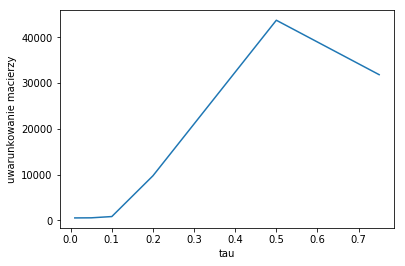

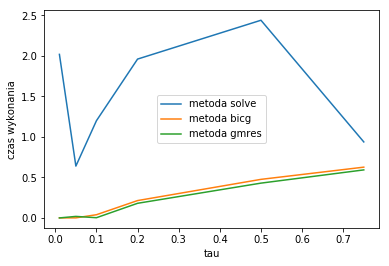

In [6]:
#Zadanie 4
import matplotlib.pyplot as plt
from scipy.sparse.linalg import gmres
from scipy.sparse.linalg import bicg
from scipy.sparse import csr_matrix

n = 500

def getA(A,t):
    mask = np.logical_not(np.absolute(A)>t)
    A = A*mask
    diagA = np.diag(np.full(n,1))
    return A+diagA+np.transpose(A)

def uwarunkowanie(matrix):
    return lg.norm(matrix)*lg.norm(lg.inv(matrix))

A1 = np.tril(np.random.uniform(-1,1,(n,n)),-1)
b = np.random.uniform(-1,1,(n,1))
tau = [0.01,0.05,0.1,0.2,0.5,0.75]

def zmierz_czas_solve(A,b,n):
    sum = 0
    for i in range(n):
        start = time.time()
        x = lg.solve(A,b)
        end = time.time()
        sum += end-start
    return (sum/n)

def zmierz_czas_bicg(A,b,n):
    sum = 0
    for i in range(n):
        start = time.time()
        x = bicg(A,b)
        end = time.time()
        sum += end-start
    return (sum/n)

def zmierz_czas_gmres(A,b,n):
    sum = 0
    for i in range(n):
        start = time.time()
        x = bicg(A,b)
        end = time.time()
        sum += end-start
    return (sum/n)

u = []
solve_times = []
bicg_times = []
gmres_times = []
for i in tau: 
    A = getA(A1,i)
    Acsr = csr_matrix(A)
    u.append(uwarunkowanie(A))
    solve_times.append(zmierz_czas_solve(A,b,5))
    bicg_times.append(zmierz_czas_bicg(Acsr,b,5))
    gmres_times.append(zmierz_czas_gmres(Acsr,b,5))

plt.plot(tau, u)
plt.xlabel('tau')
plt.ylabel('uwarunkowanie macierzy')
plt.show()
plt.plot(tau, solve_times, label="metoda solve")
plt.plot(tau, bicg_times, label="metoda bicg")
plt.plot(tau, gmres_times, label="metoda gmres")
plt.xlabel('tau')
plt.ylabel('czas wykonania')
plt.legend()
plt.show()

Im wyższy współczynnik uwarunkowania macierzy tym dłuższy czas obliczania rozwiązania układu. Metody bicg i gmres korzystające z macierzy rzadkich mają zbliżone czasy rozwiązywania układów, zaś metoda solve potrzebuje więcej czasu na rozwiązanie układu.

**Zadanie 5.**

In [7]:
def gauss_seidel(A, b, x, epsilon=0.0000001, max=100):
    LD = np.tril(A)
    U = A - LD
    i = 0
    while (i<max and lg.norm(b-(A*x))>epsilon):
        i += 1
        x = lg.inv(LD) * (-U*x+b)
    return x

def is_diagonally_dominant(A):
    LD = np.tril(A)
    U = A - LD
    B = -lg.inv(LD) * U
    e, _ = lg.eig(B)
    if np.all(np.abs(e) < 1):
        print('Macierz spełnia warunek konieczny by metoda gaussa-seidla była zbierzna')
    else:
        print('Macierz nie spełnia warunku koniecznego by metoda gaussa-seidla była zbierzna')
    D = np.diag(np.abs(A))[np.newaxis].T
    Sx = np.sum(np.abs(A), axis=1) - D
    print("Warunki wystarczające:")
    if np.all(D > Sx):
        print('Macierz spełnia warunek silnej dominacji przekątniowej w rzędach')
    else:
        print('Macierz nie spełnia warunku silnej dominacji przekątniowej w rzędach')
    Sy = np.sum(np.abs(A), axis=0) - D.T
    if np.all(D.T > Sy):
        print('Macierz spełnia warunek silnej dominacji przekątniowej w kolumnach')
    else:
        print('Macierz nie spełnia warunku silnej dominacji przekątniowej w kolumnach')
    if np.all(D >= Sx) and np.any(D > Sy):
        print('Macierz spełnia warunek słabej dominacji przekątniowej w rzędach')
    else:
        print('Macierz nie spełnia warunku słabej dominacji przekątniowej w rzędach')
    if np.all(D >= Sy) and np.any(D > Sx):
        print('Macierz spełnia warunek słabej dominacji przekątniowej w kolumnach')
    else:
        print('Macierz nie spełnia warunku słabej dominacji przekątniowej w kolumnach')

A = np.matrix([[4.0, -2.0, 1.0], [1.0, -3.0, 2.0], [-1.0, 2.0, 6.0]])
b = np.matrix([[5.0], [2.0], [3.0]])
x0 = np.matrix([[1], [1], [1]])

print("Dla A =\n",A)
is_diagonally_dominant(A)
print("oraz b =\n",b)
x = gauss_seidel(A,b,x0)
print("Metoda gaussa-seidla:\n", x)
x = lg.solve(A,b)
print("Metoda solve:\n", x)

A = np.matrix([[1.0, 2.0, 3.0], [2.0, 1.0, 3.0], [3.0, 2.0, 1.0]])
b = np.matrix([[1.0], [2.0], [0.0]])
x0 = np.matrix([[1], [1], [1]])

print("Dla A =\n",A)
is_diagonally_dominant(A)
print("oraz b =\n",b)
x = gauss_seidel(A,b,x0)
print("Metoda gaussa-seidla:\n", x)
x = lg.solve(A,b)
print("Metoda solve:\n", x)

Dla A =
 [[ 4. -2.  1.]
 [ 1. -3.  2.]
 [-1.  2.  6.]]
Macierz spełnia warunek konieczny by metoda gaussa-seidla była zbierzna
Warunki wystarczające:
Macierz nie spełnia warunku silnej dominacji przekątniowej w rzędach
Macierz nie spełnia warunku silnej dominacji przekątniowej w kolumnach
Macierz spełnia warunek słabej dominacji przekątniowej w rzędach
Macierz nie spełnia warunku słabej dominacji przekątniowej w kolumnach
oraz b =
 [[5.]
 [2.]
 [3.]]
Metoda gaussa-seidla:
 [[1.16438357]
 [0.15068493]
 [0.64383562]]
Metoda solve:
 [[1.16438356]
 [0.15068493]
 [0.64383562]]
Dla A =
 [[1. 2. 3.]
 [2. 1. 3.]
 [3. 2. 1.]]
Macierz nie spełnia warunku koniecznego by metoda gaussa-seidla była zbierzna
Warunki wystarczające:
Macierz nie spełnia warunku silnej dominacji przekątniowej w rzędach
Macierz nie spełnia warunku silnej dominacji przekątniowej w kolumnach
Macierz nie spełnia warunku słabej dominacji przekątniowej w rzędach
Macierz nie spełnia warunku słabej dominacji przekątniowej w kolu

Metoda Gaussa-Seidla daje poprawne wyniki kiedy jest zbieżna. Dla pierwszej macierzy metoda jest zbierzna gdyż macierz spełnia warunek konieczny i jeden z warunków wystarczających zbierzności, zaś dla drugiej macierzy metoda nie jest zbierzna gdyż macierz nie spełnia warunku koniecznego zbierzności. 